In [2]:
import requests 
from bs4 import BeautifulSoup as bs
import re

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
#creating an empty review list
redmi_reviews = []

In [5]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [5]:
    
##Writing reviews in a text file
with open("redmi.txt","w",encoding = 'utf-8') as output:
    output.write(str(redmi_reviews))

In [8]:
path = 'C:/Users/Admin/Desktop/Data/Assignments New/Text Mining'

In [10]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [11]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(redmi_reviews)

In [12]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [13]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [16]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

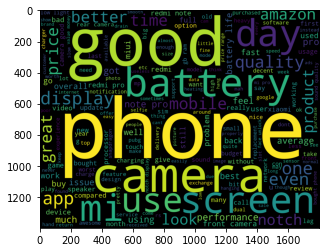

In [17]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

plt.imshow(wordcloud_ip)

In [20]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/Admin/Desktop/Data/Assignments New/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [21]:
poswords = poswords[36:]

In [22]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/Admin/Desktop/Data/Assignments New/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [23]:
negwords =negwords[37:]

In [24]:
##Negative word cloud word cloud
##taking those words from the words which are present in the negative words

red_neg_= ' '.join([w for w in red_rev_words if w in negwords])

In [25]:
##Negative word cloud
wordcloud_neg= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_neg_)

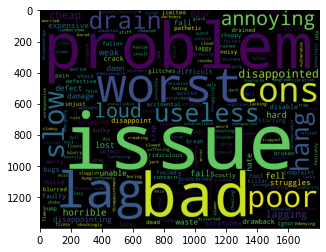

In [26]:
plt.imshow(wordcloud_neg)

In [27]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in poswords])

In [28]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

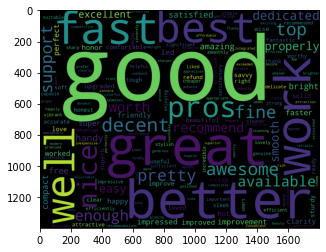

In [29]:
plt.imshow(wordcloud_pos)

In [30]:
##Unique words
red_unique = list(set(" ".join(redmi_reviews).split(" ")))